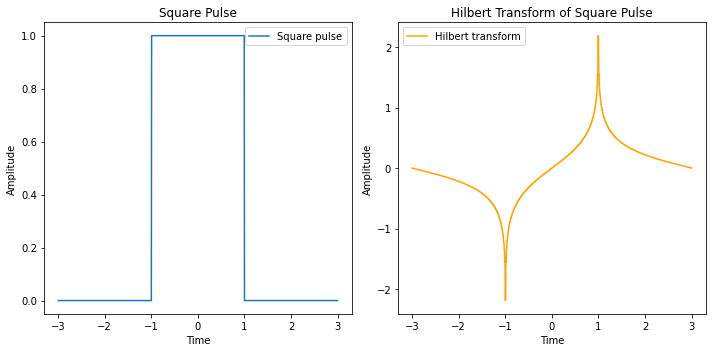

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Define the square pulse function
def square_pulse(t, T):
    return np.where(np.abs(t) < T / 2, 1, 0)

# Parameters
T = 2
t = np.linspace(-3, 3, 1000)

# Compute the square pulse and its Hilbert transform
pulse = square_pulse(t, T)
hilbert_pulse = np.imag(hilbert(pulse))

# Plot the square pulse and its Hilbert transform
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(t, pulse, label="Square pulse")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Square Pulse")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, hilbert_pulse, label="Hilbert transform", color="orange")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Hilbert Transform of Square Pulse")
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
def cauchy(x,x0,w):
    f = (1 / np.pi) * (w / ( (x - x0 )**2 + w**2))
    return f

In [3]:
def wedge(x,x0,w,h0=1.):
    f = 1.-np.abs(x-x0)/w
    f = h0 * np.where(f>0,f,0)
    return f

In [4]:
def sinewv(x,x0,w,h0=1.):
    f = h0*np.sin( (2*np.pi/w)*(x-x0) )
    return f

In [5]:
def witch(x,x0,w,h0=1.):
    f = h0/( 1 +  ((x-x0)/w)**2 )
    return f

In [10]:
nx=10001
x=np.linspace(-100.,100.,num=nx)
x0=0.
w=10.
#f0=wedge(x=x,x0=x0,w=w,h0=1000.)
f0=sinewv(x=x,x0=x0,w=40.,h0=400.)
#f0=witch(x=x,x0=x0,w=w,h0=1000.)
hilbert_f0=np.imag( hilbert(f0))

In [11]:
nz=101
z=np.linspace(0,20_000.,num=nz)
U=10.
N=0.01
m=N/U
X,Z = np.meshgrid(x,z)
print(np.shape(X))

(101, 10001)


In [12]:
delts = np.zeros((nz,nx))
strmf = np.zeros((nz,nx))
for l in np.arange(nz):
    delts[l,:] = f0[:]*np.cos( m*z[l] ) - hilbert_f0[:]*np.sin( m*z[l] )
    strmf[l,:] = z[l]-delts[l,:]

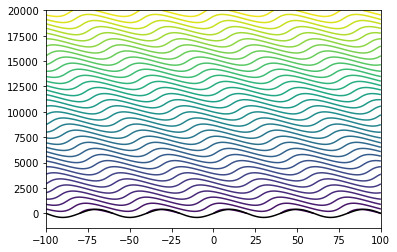

In [13]:
plt.contour(X,Z,strmf,levels=40)
plt.plot(x,f0,color='black')

In [ ]:
plt.plot(x,f0)

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x, f0, label="Function")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.title("Function")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, hilbert_f0, label="Hilbert transform", color="orange")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.title("Hilbert Transform of Function")
plt.legend()


In [ ]:
nz=101
z=np.linspace(0,20_000.,num=nz)
U=10.
N=0.01
m=N/U
X,Z = np.meshgrid(x,z)
print(np.shape(X))

In [ ]:
delts = np.zeros((nz,nx))
strmf = np.zeros((nz,nx))
for l in np.arange(nz):
    delts[l,:] = f0[:]*np.cos( m*z[l] ) - hilbert_f0[:]*np.sin( m*z[l] )
    strmf[l,:] = z[l]-delts[l,:]

In [ ]:
plt.plot(strmf[0,:])

In [ ]:
plt.contour(X,Z,strmf,levels=40)
plt.plot(x,f0,color='black')